# Implementing Logistic Regression 

In [4]:
import pandas as pd 
import numpy as np 
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
rain_df = pd.read_csv('D:\Data Analysis With Python\Machine Learning - Scikit learn\My Notes\data\weatherAUS.csv')

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Sian\AppData\Local\Temp\ipykernel_20024\171121386.py:1: SyntaxWarning: invalid escape sequence '\D'
  rain_df = pd.read_csv('D:\Data Analysis With Python\Machine Learning - Scikit learn\My Notes\data\weatherAUS.csv')


In [6]:
rain_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [7]:
rain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Analying the unique values

In [13]:
for i in rain_df.drop(columns=['Date']).columns :
    if(rain_df[i].dtype==object):
        print(f"Unique Values in {i} is :{rain_df[i].unique()}")

Unique Values in Location is :['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']
Unique Values in WindGustDir is :['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' nan 'ENE' 'SSE' 'S' 'NW' 'SE'
 'ESE' 'E' 'SSW']
Unique Values in WindDir9am is :['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' nan 'SSW' 'N' 'WSW' 'ESE' 'E'
 'NW' 'WNW' 'NNE']
Unique Values in WindDir3pm is :['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' nan 'NE']
Unique Values in Ra

In [9]:
null_count=[]
for i in rain_df.columns:
    null_count.append(rain_df[i].isnull().sum())
    print(f"Null Values in {i} are : {rain_df[i].isnull().sum()}")
null_list=pd.Series(null_count,index=[x for x in rain_df.columns])

Null Values in Date are : 0
Null Values in Location are : 0
Null Values in MinTemp are : 1485
Null Values in MaxTemp are : 1261
Null Values in Rainfall are : 3261
Null Values in Evaporation are : 62790
Null Values in Sunshine are : 69835
Null Values in WindGustDir are : 10326
Null Values in WindGustSpeed are : 10263
Null Values in WindDir9am are : 10566
Null Values in WindDir3pm are : 4228
Null Values in WindSpeed9am are : 1767
Null Values in WindSpeed3pm are : 3062
Null Values in Humidity9am are : 2654
Null Values in Humidity3pm are : 4507
Null Values in Pressure9am are : 15065
Null Values in Pressure3pm are : 15028
Null Values in Cloud9am are : 55888
Null Values in Cloud3pm are : 59358
Null Values in Temp9am are : 1767
Null Values in Temp3pm are : 3609
Null Values in RainToday are : 3261
Null Values in RainTomorrow are : 3267


Comparing the Null Values Counts

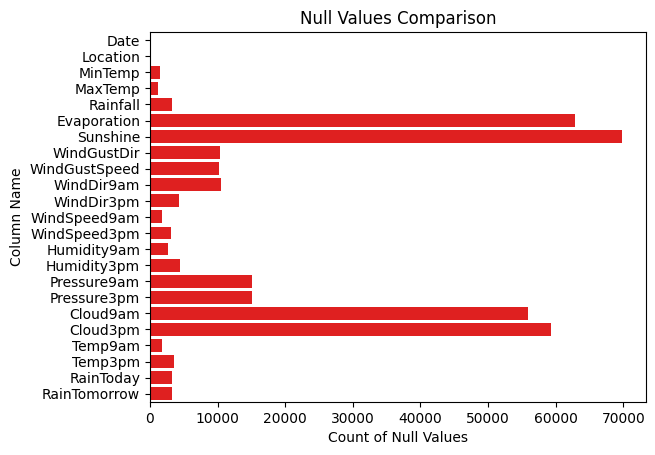

In [18]:
plt.title("Null Values Comparison")
plt.xlabel("Count of Null Values")
plt.ylabel("Column Name")
sns.barplot(x=null_list,y=null_list.index,color='red');

Here it is important to note that the Target Columns have some Null values so it can't be used to train our final model. Dropping Sample values for which the  target columnn is empty

In [17]:
rain_df.dropna(subset=['RainToday','RainTomorrow'],inplace=True)

Here we have dropped all the null samples from RainToday as well as RainTomorrow as Raintoday plays a major part in determining whether it would rain tommorrow

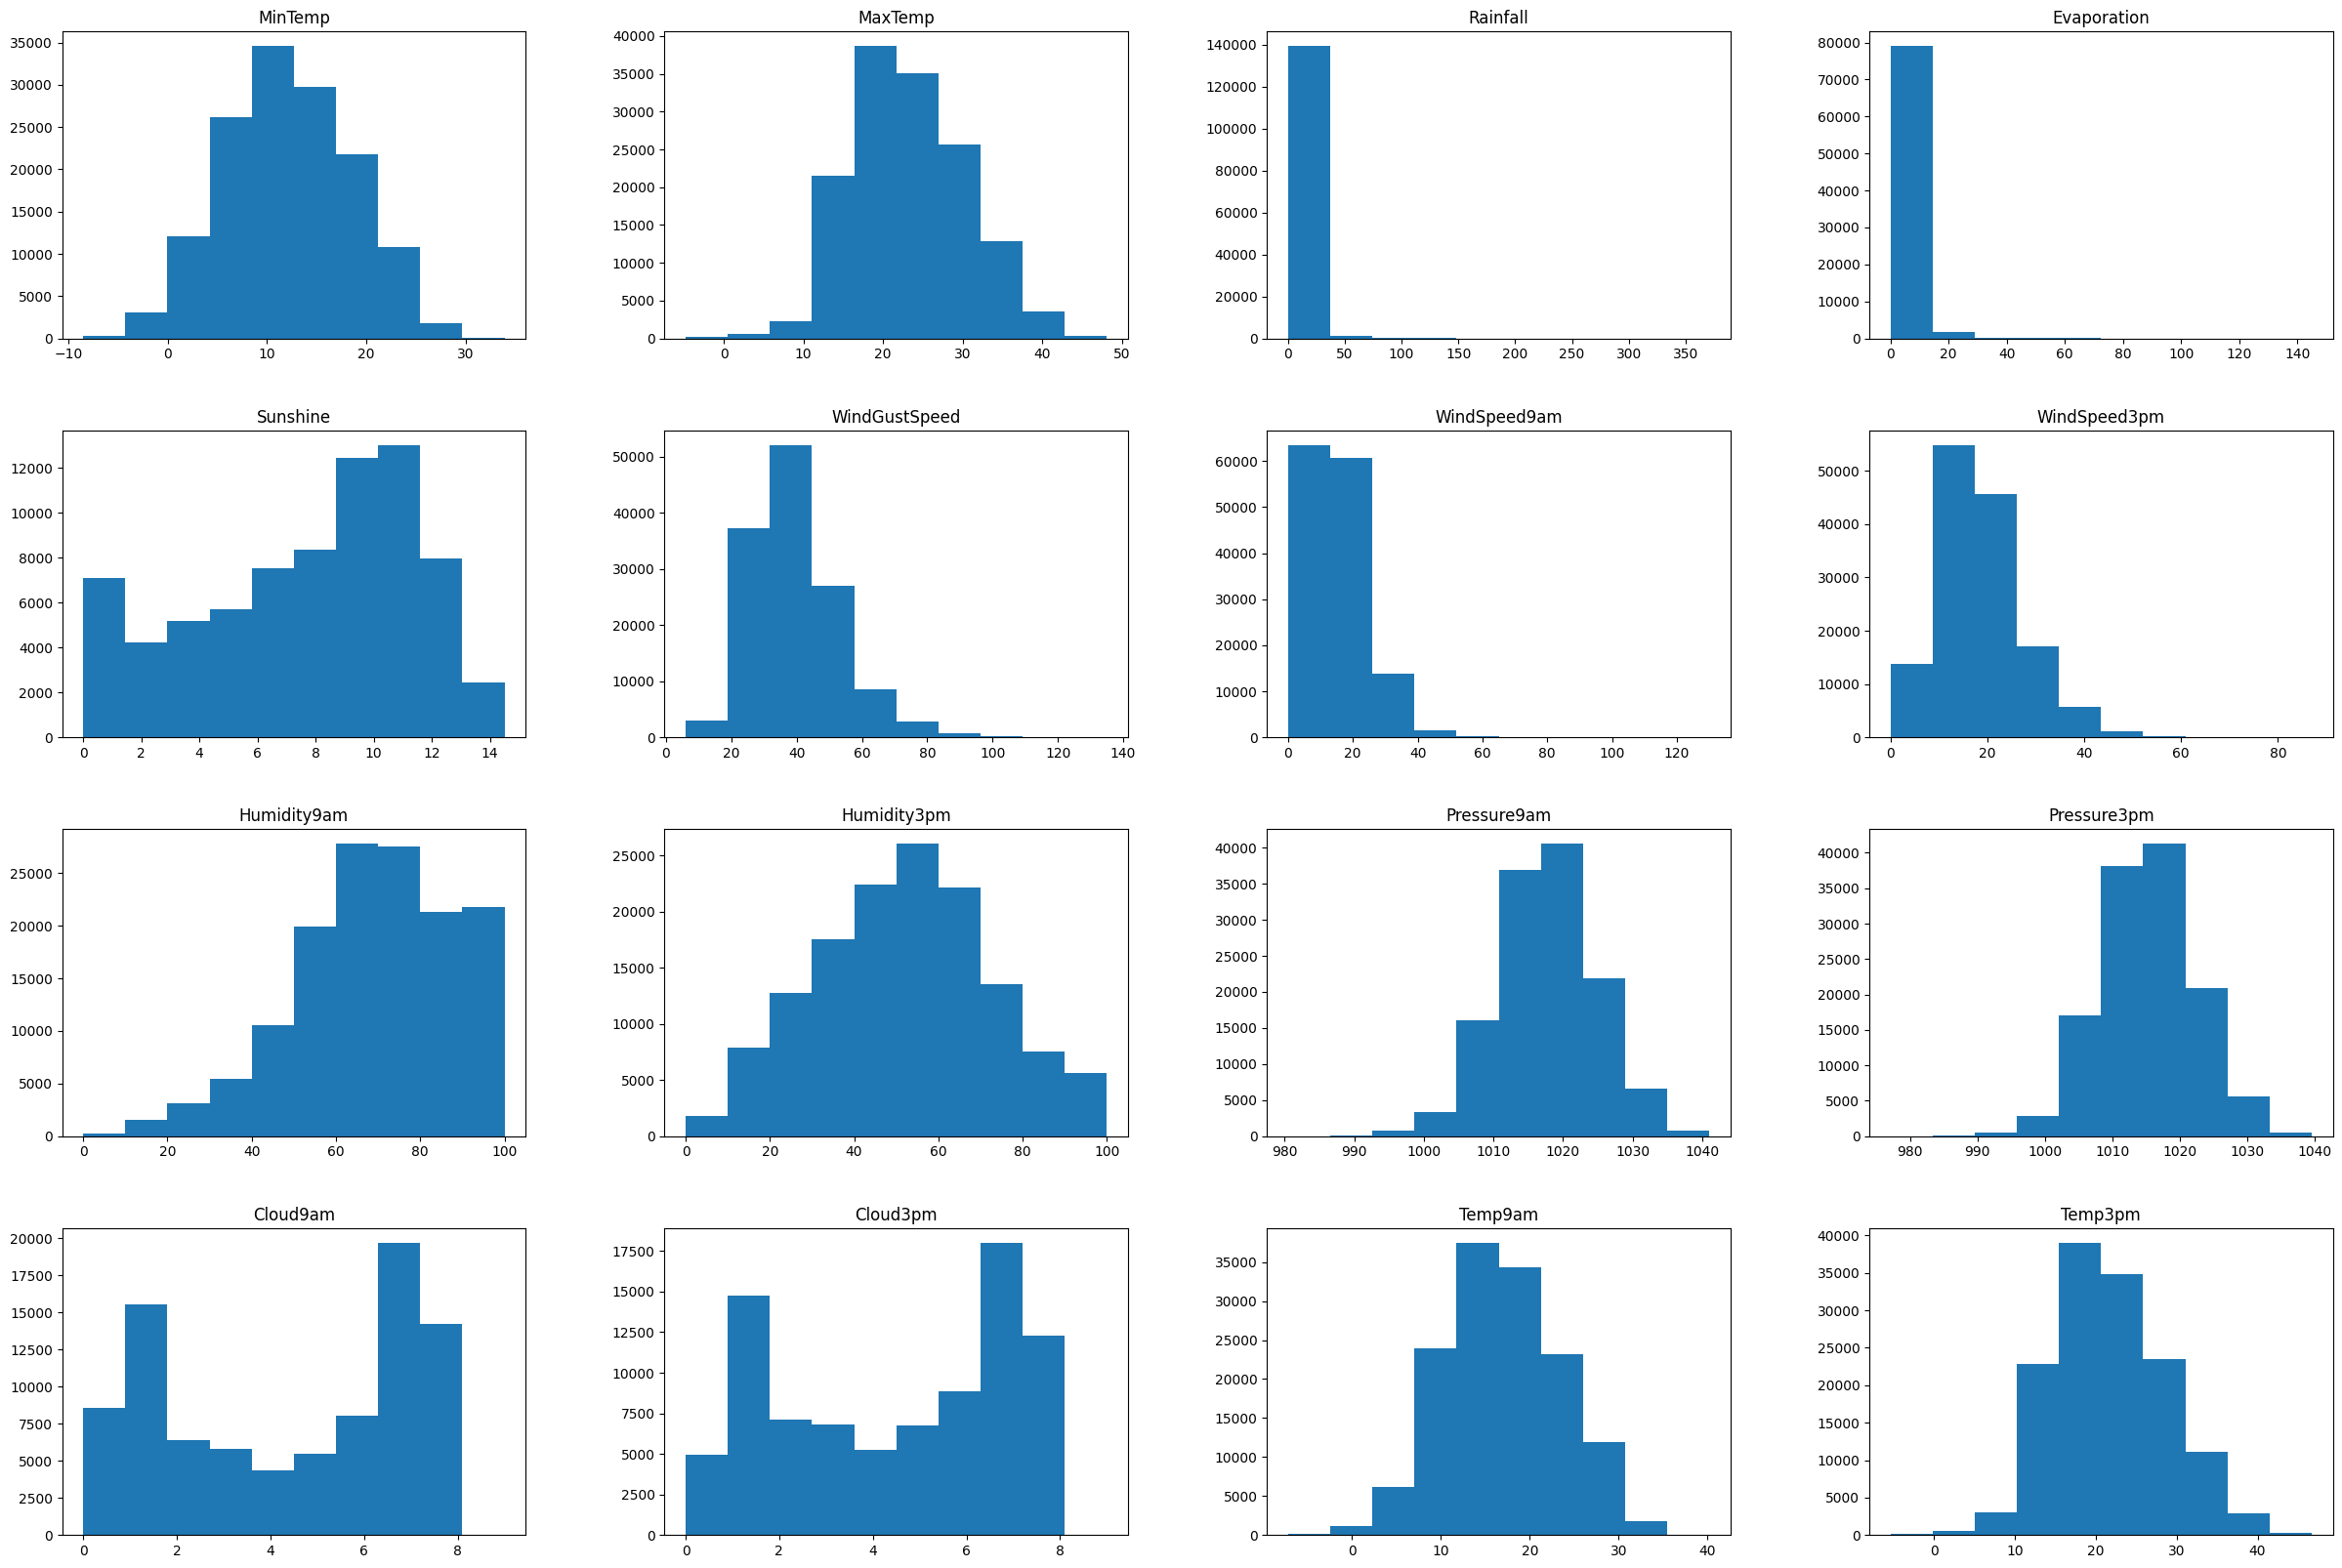

In [22]:
# plt.title("Distribution of Features in the Data")
rain_df.hist(grid=False,figsize=(30,20));

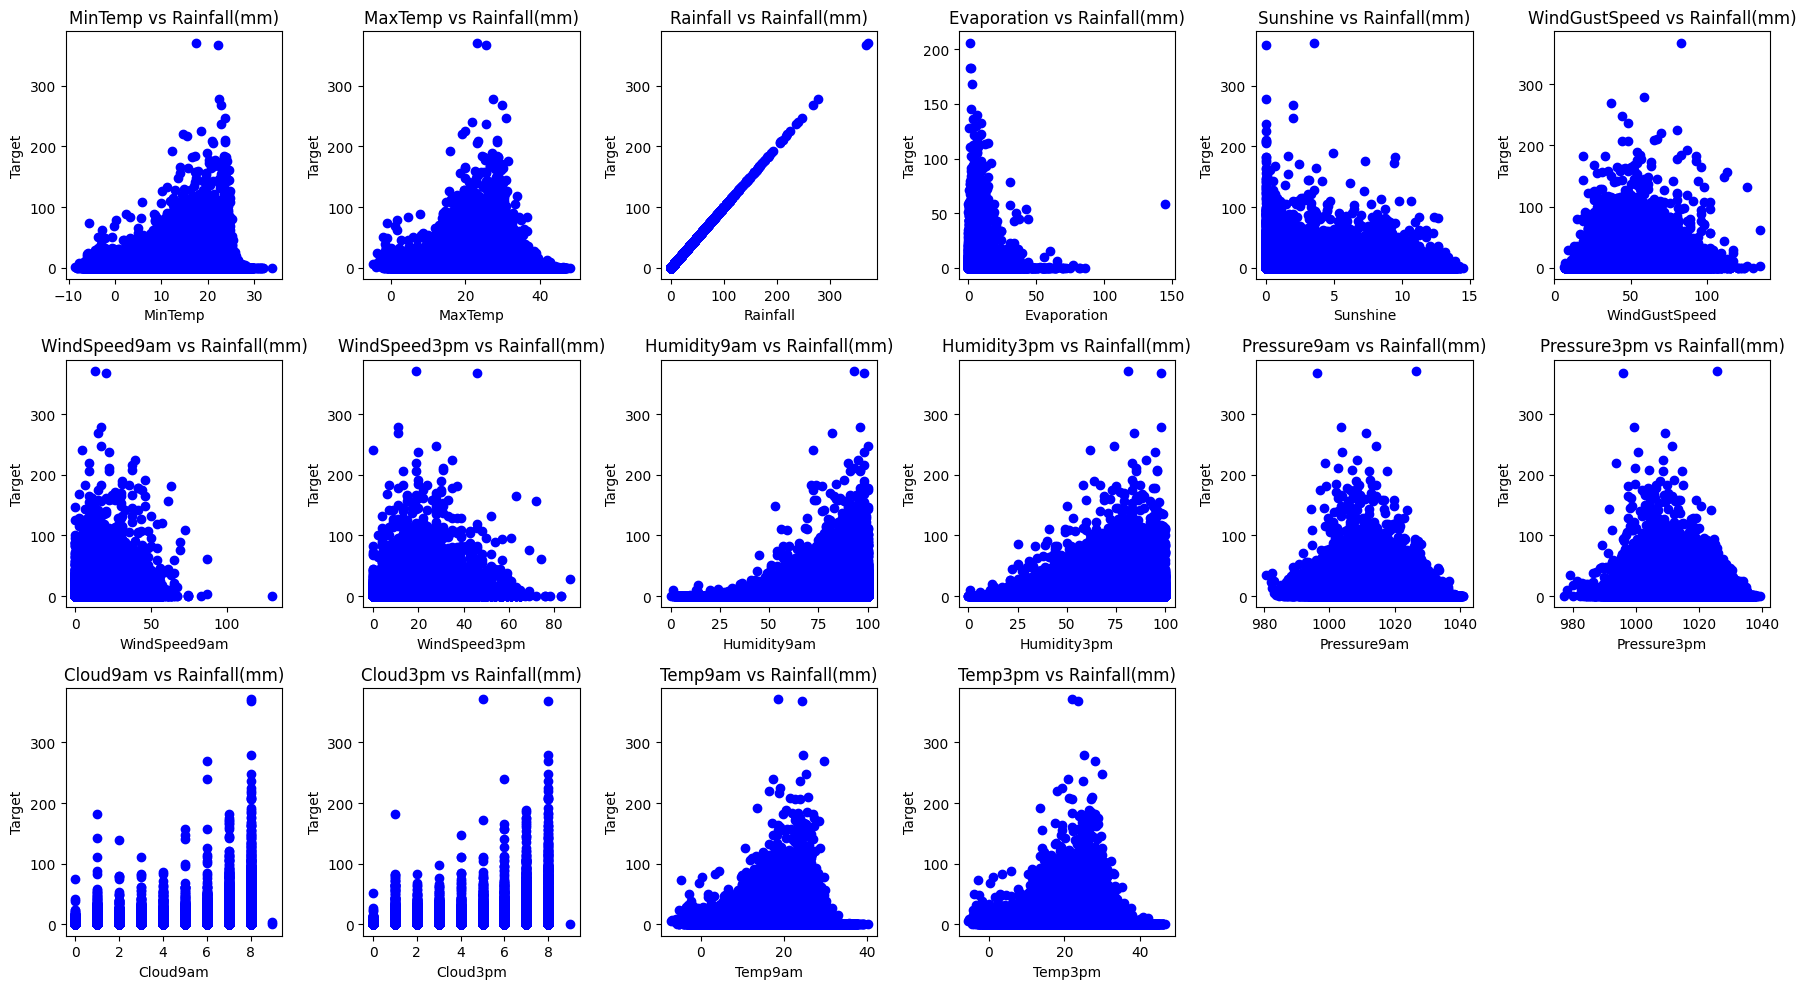

In [33]:
features = [x for x in rain_df.columns if(rain_df[x].dtype!=object)]

# Create subplots with 3 rows and 6 columns to fit 18 features
fig, axs = plt.subplots(3, 6, figsize=(18, 10))  # 3 rows, 6 columns

# Flatten the 2D array of axes for easy indexing
axs = axs.flatten()

# Loop through each feature and plot
for i, feature in enumerate(features):
    axs[i].scatter(rain_df[feature], rain_df['Rainfall'], color='b', marker='o')
    axs[i].set_title(f'{feature} vs Rainfall(mm)')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Target')

# Remove any empty subplots if not exactly 18 features
for j in range(len(features), len(axs)):
    fig.delaxes(axs[j])

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()